# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Loading Datasets

In [2]:
df1 = pd.read_csv('EV_types.csv')
df2 = pd.read_csv('ElectricCarData_Norm.csv')

In [3]:
df1.head()

,S.No.,State Name,2W,3W,4W,No. of Operational PCS
0,1,Andaman and Nicobar Island,7,30,132,3
1,2,Andhra Pradesh,27631,482,1219,222
2,3,Arunachal Pradesh,14,0,7,9
3,4,Assam,2287,79661,268,48
4,5,Bihar,13472,96562,291,83


In [4]:
df2.head()

,Brand,Model,Accel_sec,TopSpeed_km/h,Range_km,Efficiency_Wh/km,FastCharge_km/h,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


# EDA

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   S.No.                   33 non-null     int64 
 1   State Name              33 non-null     object
 2   2W                      33 non-null     int64 
 3   3W                      33 non-null     int64 
 4   4W                      33 non-null     int64 
 5   No. of Operational PCS  33 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


In [6]:
df2['FastCharge_km/h'] = pd.to_numeric(df2['FastCharge_km/h'], errors='coerce')
df2.info()

# The missing values in the FastCharge_km/h means that the model does not support the fast charging so I am replacing the nan with 0's.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             103 non-null    object 
 1   Model             103 non-null    object 
 2   Accel_sec         103 non-null    float64
 3   TopSpeed_km/h     103 non-null    int64  
 4   Range_km          103 non-null    int64  
 5   Efficiency_Wh/km  103 non-null    int64  
 6   FastCharge_km/h   98 non-null     float64
 7   RapidCharge       103 non-null    object 
 8   PowerTrain        103 non-null    object 
 9   PlugType          103 non-null    object 
 10  BodyStyle         103 non-null    object 
 11  Segment           103 non-null    object 
 12  Seats             103 non-null    int64  
 13  PriceEuro         103 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.4+ KB


In [7]:
df2['FastCharge_km/h'] = df2['FastCharge_km/h'].fillna(0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             103 non-null    object 
 1   Model             103 non-null    object 
 2   Accel_sec         103 non-null    float64
 3   TopSpeed_km/h     103 non-null    int64  
 4   Range_km          103 non-null    int64  
 5   Efficiency_Wh/km  103 non-null    int64  
 6   FastCharge_km/h   103 non-null    float64
 7   RapidCharge       103 non-null    object 
 8   PowerTrain        103 non-null    object 
 9   PlugType          103 non-null    object 
 10  BodyStyle         103 non-null    object 
 11  Segment           103 non-null    object 
 12  Seats             103 non-null    int64  
 13  PriceEuro         103 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.4+ KB


In [8]:
# Statistical summary of the datasets
data1 = df1.describe()
data2 = df2.describe()
display('Dataset 1', data1, 'Dataset 2', data2)

'Dataset 1'

,S.No.,2W,3W,4W,No. of Operational PCS
count,33.00000,33.000000,33.000000,33.000000,33.000000
mean,17.00000,24648.393939,27849.212121,2086.090909,188.515152
std,9.66954,38143.648427,69575.312357,3991.825141,348.275046
min,1.00000,1.000000,0.000000,6.000000,1.000000
25%,9.00000,196.000000,56.000000,112.000000,16.000000
50%,17.00000,8744.000000,3640.000000,335.000000,48.000000
75%,25.00000,32231.000000,14407.000000,1518.000000,195.000000
max,33.00000,149986.000000,375596.000000,17725.000000,1845.000000


'Dataset 2'

,Accel_sec,TopSpeed_km/h,Range_km,Efficiency_Wh/km,FastCharge_km/h,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,434.563107,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,219.660061,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,0.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


### 2-wheeler EV's

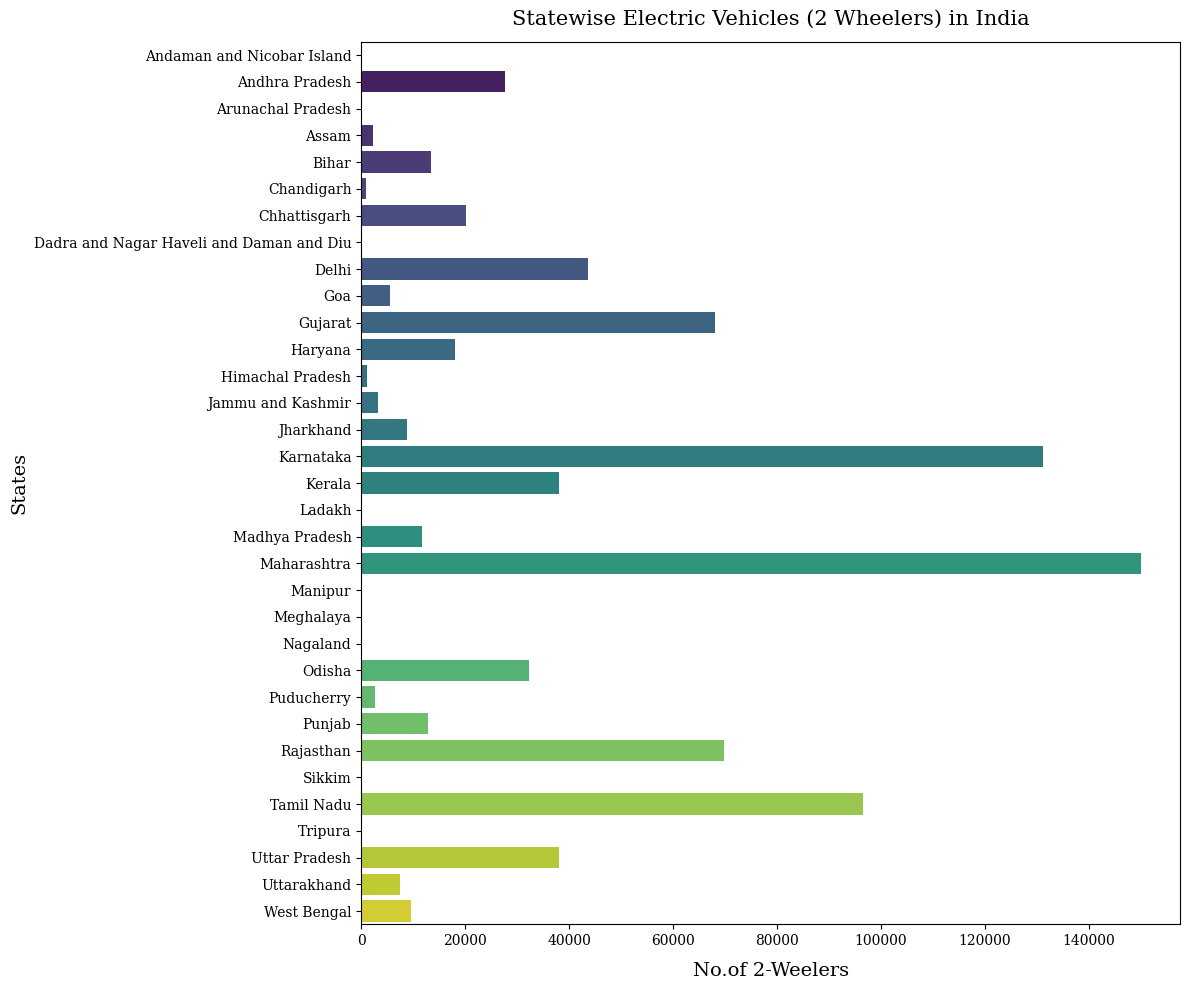

In [9]:
plt.figure(figsize=(12,10))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='2W', palette='viridis')
plt.ylabel('States', fontsize=14, family='serif')
plt.xlabel('No.of 2-Weelers', fontsize=14, family='serif', labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.tight_layout()
plt.show()

Observations: According to the analysis on the dataset of EV used in India recorded in 2022. Maharashtra,Karnataka, Tamil Nadu, Gujarat, Rajasthan, Delhi seems to be the top states that uses the EV 2-wheelers.

### 3-wheeler EV's

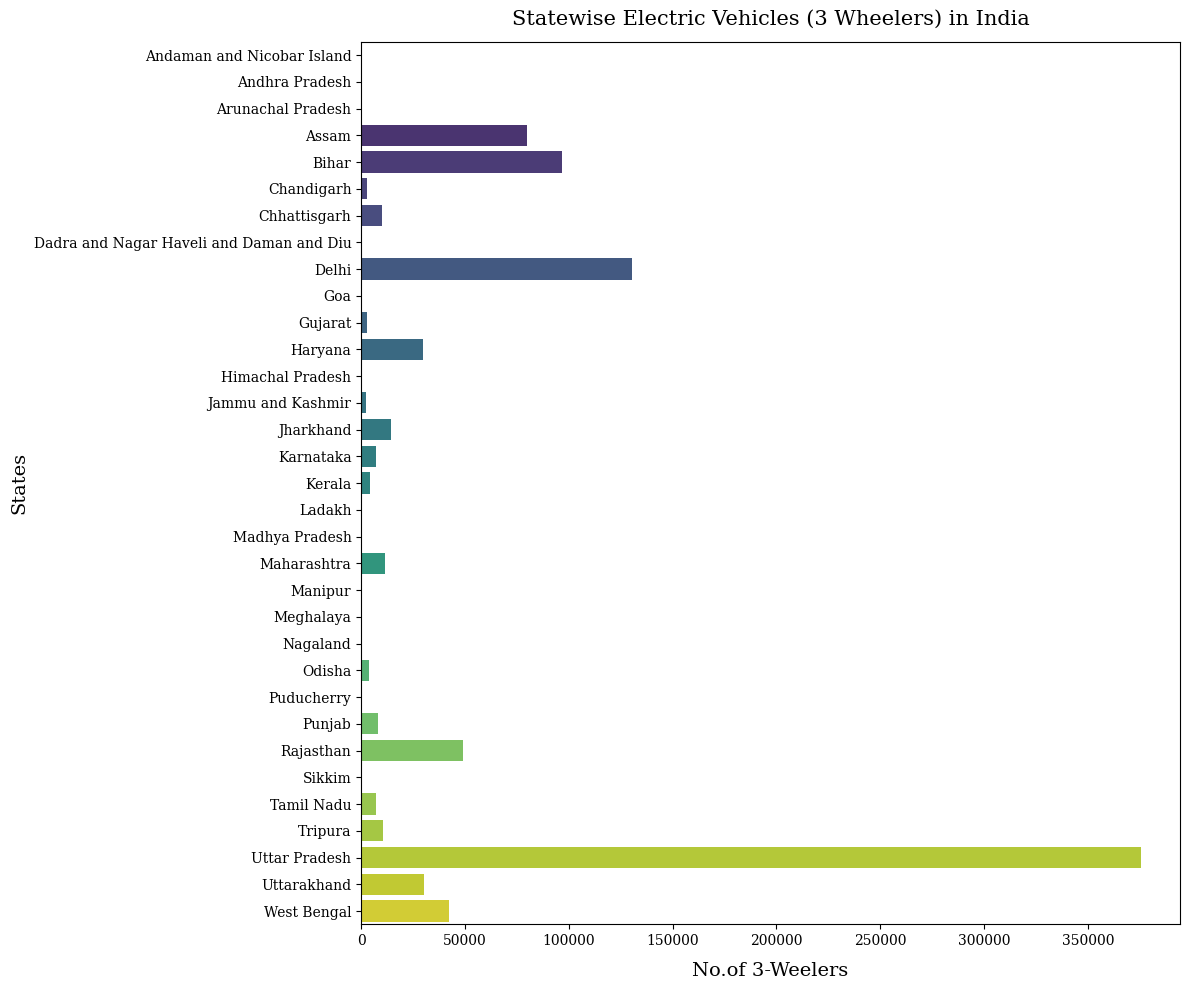

In [10]:
plt.figure(figsize=(12,10))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='3W', palette='viridis')
plt.ylabel('States', fontsize=14, family='serif')
plt.xlabel('No.of 3-Weelers', fontsize=14, family='serif', labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', family='serif', size=15, pad=12)
plt.tight_layout()
plt.show()

Observations: According to the analysis on the dataset of EV used in India recorded in 2022. Uttar Pradesh, Delhi, Bihar, Assam seems to be the top states that uses the EV 3-wheelers.

### 4-wheeler EV's

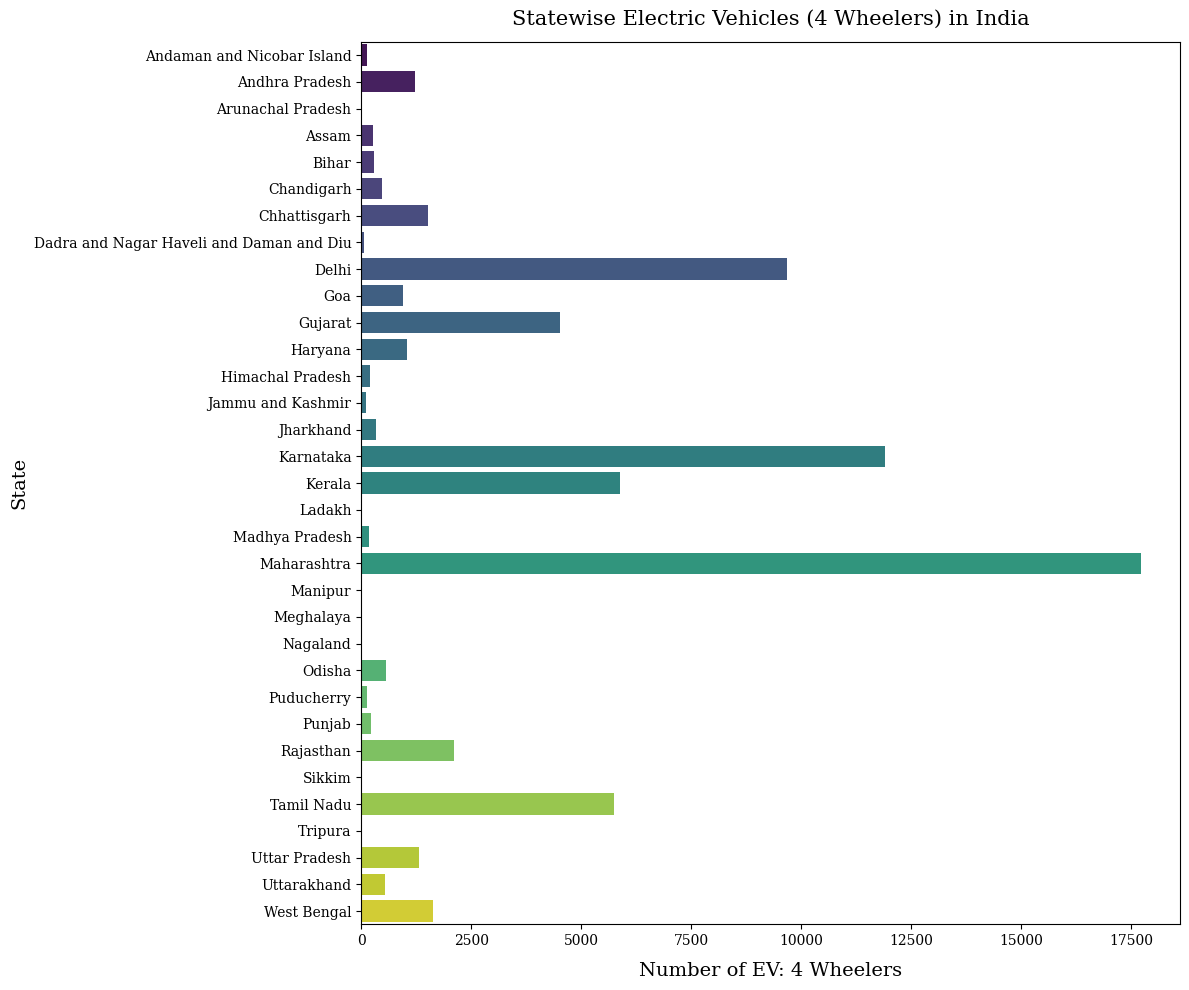

In [11]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='4W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', family='serif', size=15, pad=12)
plt.tight_layout()
plt.show()

Observations: According to the analysis on the dataset of EV used in India recorded in 2022. Maharashtra, Karnataka, Delhi, Kerala, Tamil Nadu seems to be the top states that uses the EV 3-wheelers.

### Public Charging Stations (PCS) in India

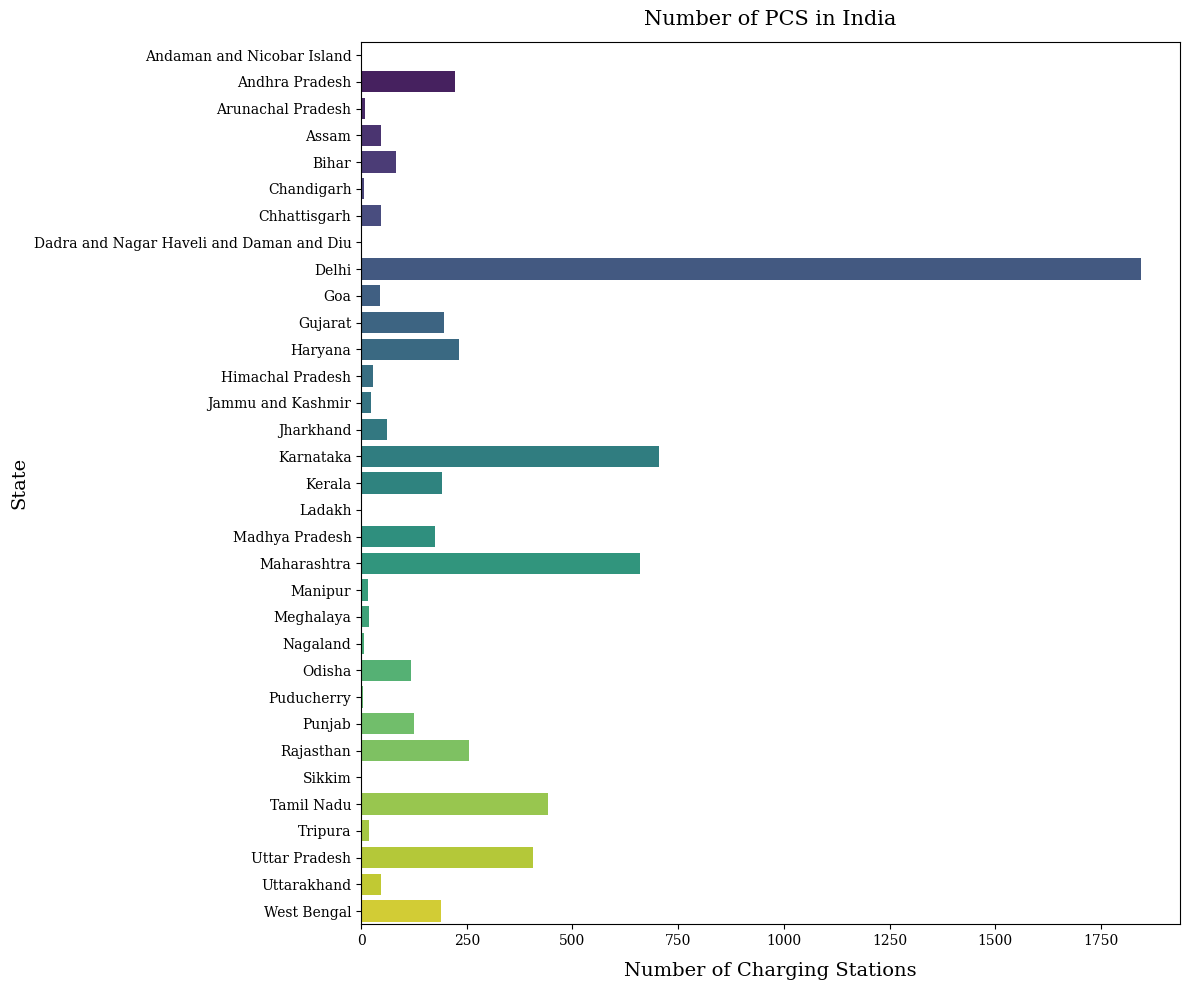

In [12]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df1, y=df1['State Name'].sort_values(ascending=True), x='No. of Operational PCS', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of PCS in India', weight=200, family='serif', size=15, pad=12)
plt.tight_layout()
plt.show()

Observation: According to latest updates Delhi, Karnataka, Maharashtra, Tamil Nadu, Uttar Pradesh are among the top states with the majority of PCS for EV charging while the remaining states have less number of the same.

### Brand-wise EV's

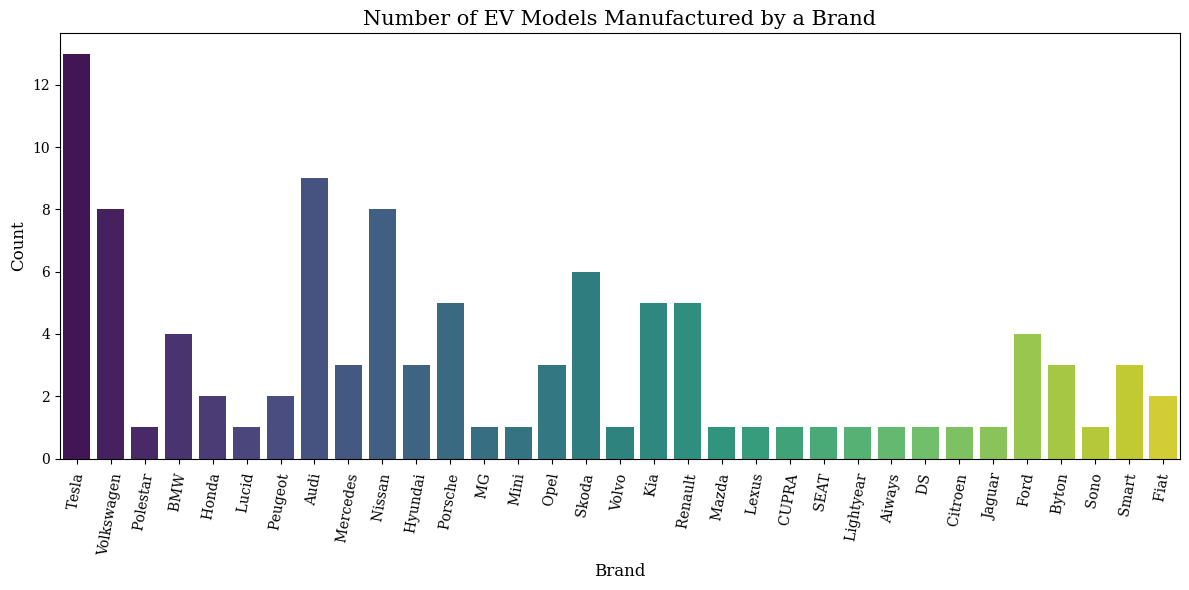

In [13]:
sns.catplot(data=df2, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=80)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.tight_layout()
plt.show()

Observation: Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

### Body Styles of EV's

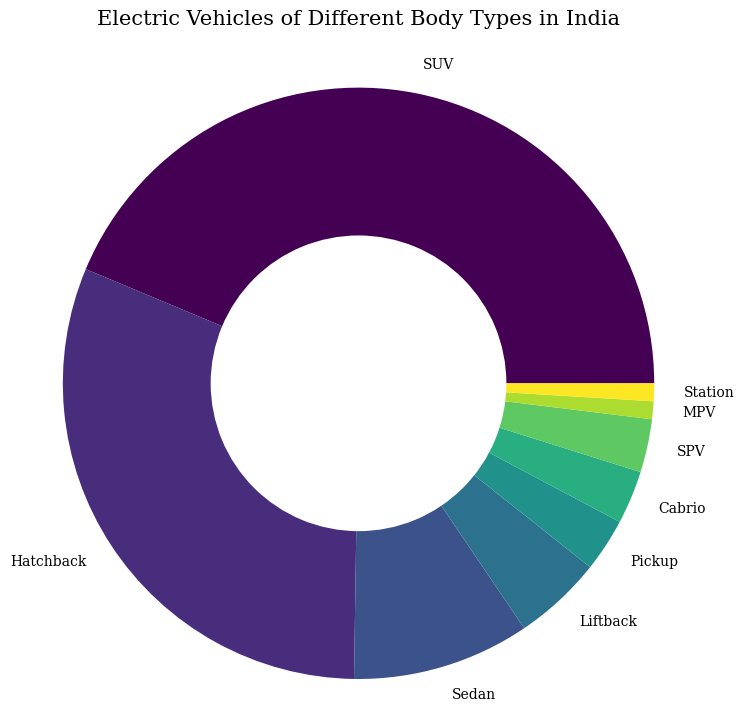

In [14]:
x = df2['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', textprops=dict(family='serif'))
plt.pie(x=[1], radius=1, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=125)
plt.ylabel('')
plt.show()

Observation: SUV, Hatchback are the most popular body style used for EV's.

### Segments of EV

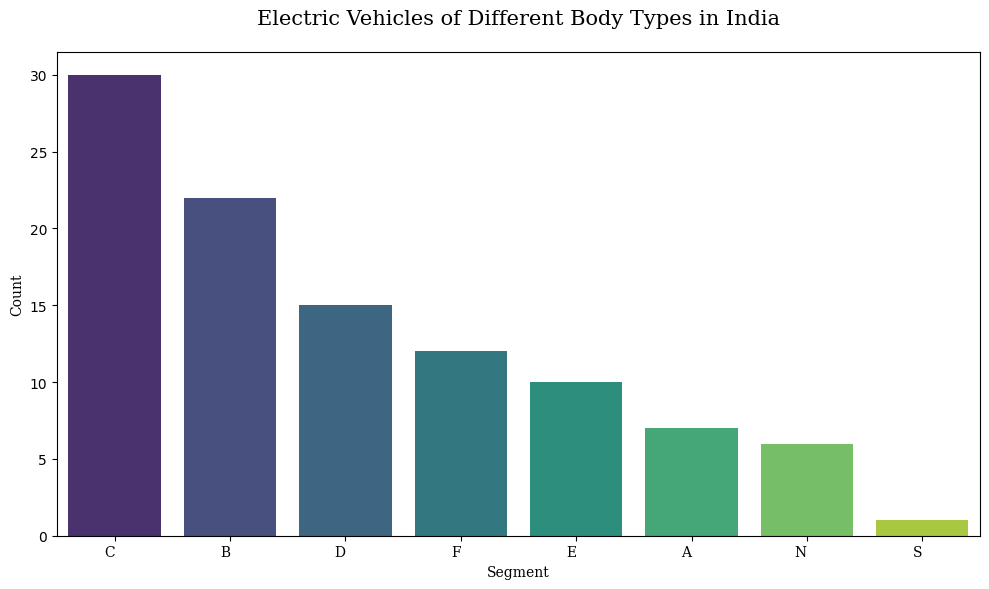

In [15]:
# Get the value counts of 'Segment'
segment_counts = df2['Segment'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=20)
plt.xlabel('Segment', family='serif')
plt.ylabel('Count', family='serif')
plt.xticks(rotation=0, ha='right', fontsize=10, family='serif')
plt.tight_layout()
plt.show()

Observation: C and B body segments form the majority while S and N the minority.

### EV's with different no.of seats

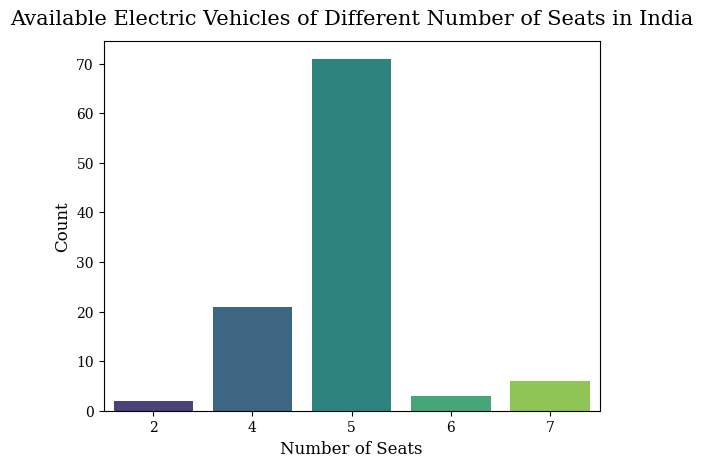

In [16]:
sns.countplot(data=df2, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

Observation: 5 seater EV are most popular one.

### Seats in vehicals by brand

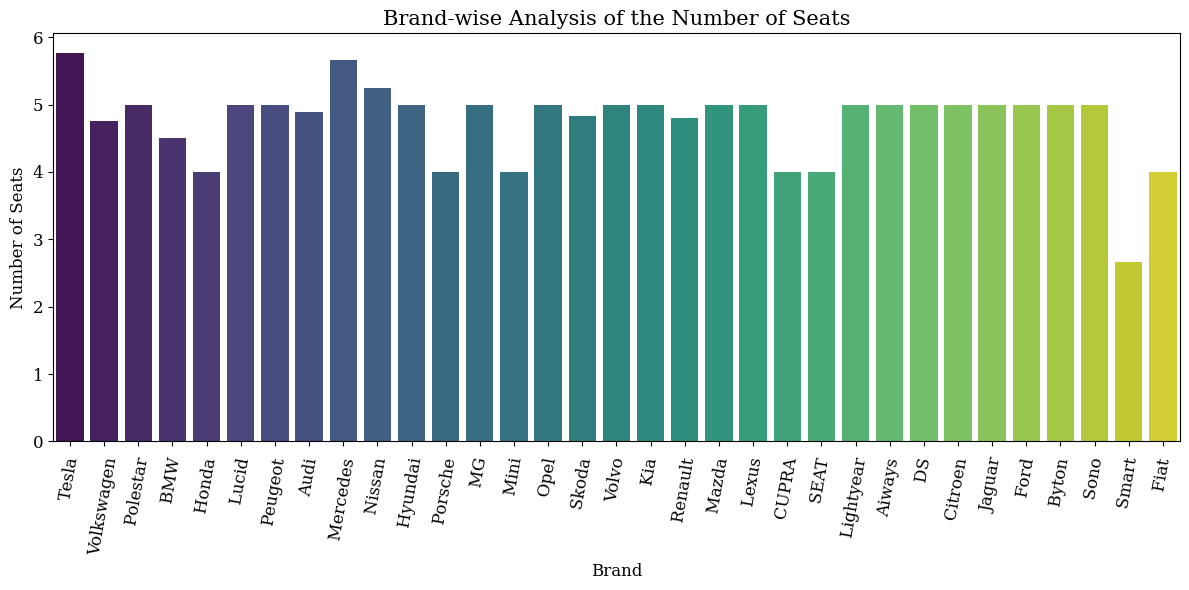

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='Brand', y='Seats', palette='viridis', errorbar=None)
sns.despine(right=False, top=False)
plt.xticks(rotation=80, family='serif', fontsize=12)
plt.yticks(family='serif', fontsize=12)
plt.xlabel('Brand', family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15)
plt.tight_layout()
plt.show()

### Types of connectors for charging

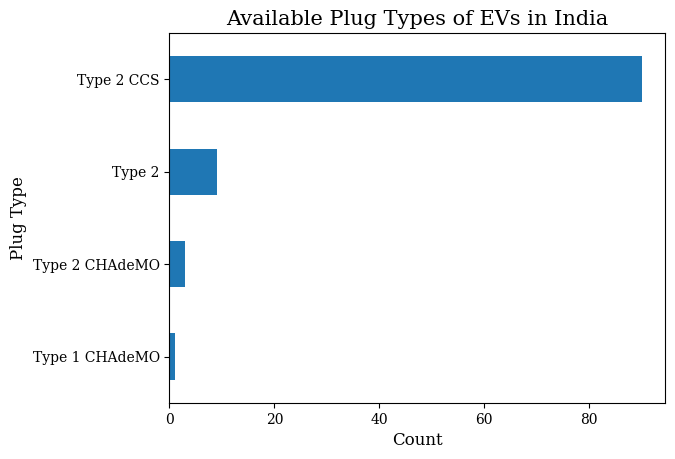

In [18]:
df2['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

Observation: Type 2 CCS are the most used charging connectors in India.

### Brand Sales

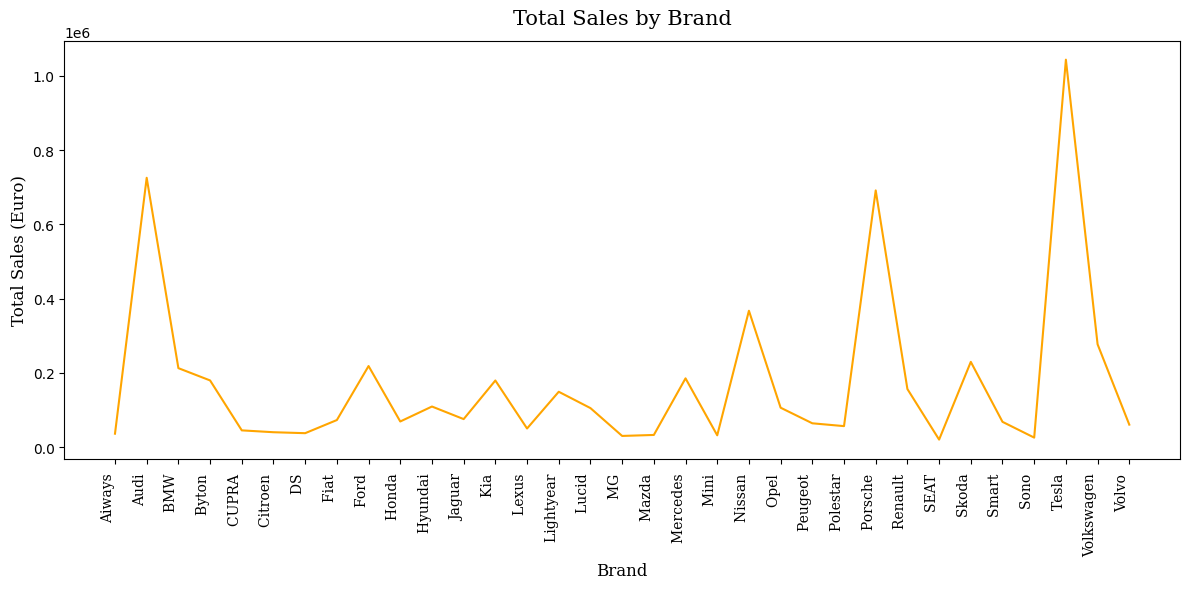

In [19]:
brand_sales = df2.groupby('Brand')['PriceEuro'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(brand_sales['Brand'], brand_sales['PriceEuro'], color='orange')
plt.xlabel('Brand', family='serif', size=12)
plt.ylabel('Total Sales (Euro)', family='serif', size=12)
plt.title('Total Sales by Brand', family='serif', size=15, pad=12)
plt.xticks(rotation=90, ha='right', fontsize=10, family='serif')
plt.tight_layout()
plt.show()

Observation: Tesla, Audi, Porsche are the top brand that has highest sales in the EV market.

### Brand-wise accleration

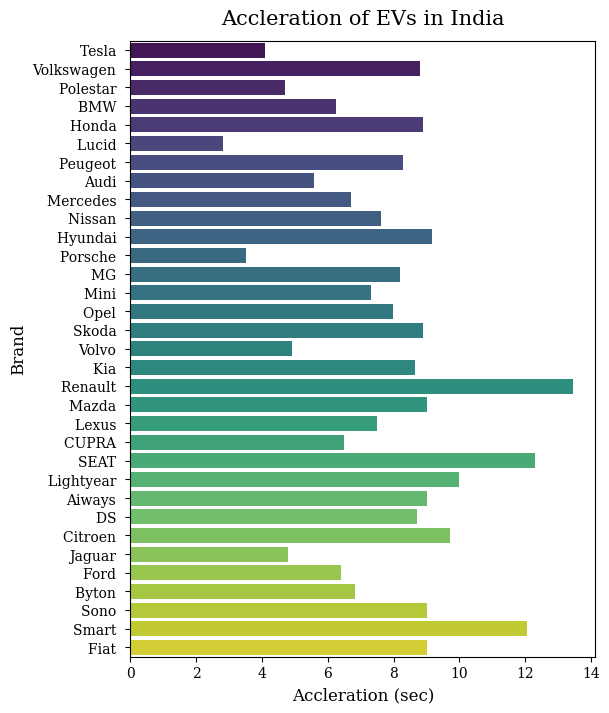

In [20]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, y='Brand', x='Accel_sec', errorbar=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration (sec)', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

Observation: Renault, SEAT, Smart are top brands that has high accleration in there products.

###  Brand-wise speed 

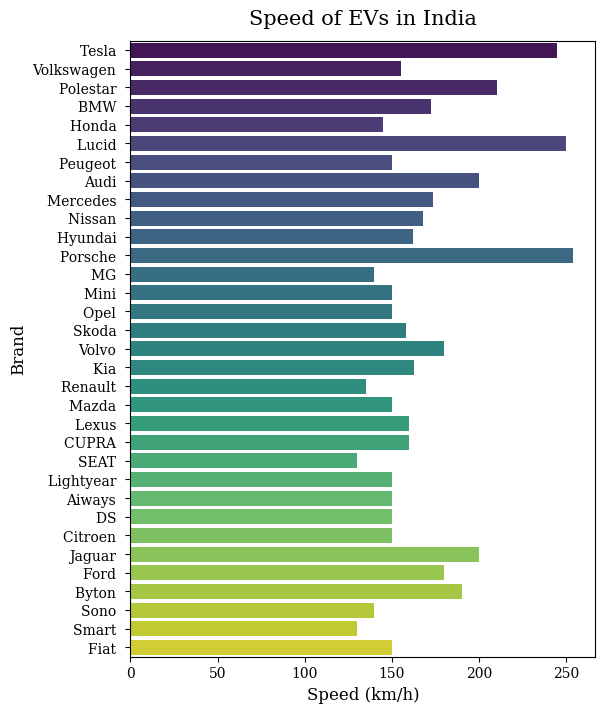

In [21]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, y='Brand', x='TopSpeed_km/h', errorbar=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Speed (km/h)', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Speed of EVs in India', family='serif', size=15, pad=12)
plt.show()

Observation: Tesla, Lucid, Porsche are the top contenders in terms of speed of EV's.

### Correlation Matrix

C:\Users\divya\AppData\Local\Temp\ipykernel_15172\454781018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)


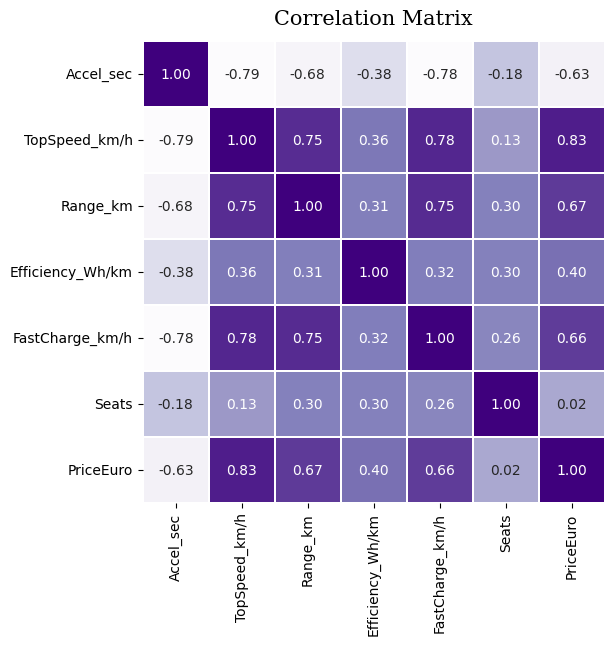

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df2.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12)
plt.show()

# K-Means Clustering

In [23]:
df2['PowerTrain'] = df2['PowerTrain'].replace(to_replace=['Rear Wheel Drive','Front Wheel Drive','All Wheel Drive'], value=[0,1,2])
df2['RapidCharge'] = df2['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'], value=[0,1])

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             103 non-null    object 
 1   Model             103 non-null    object 
 2   Accel_sec         103 non-null    float64
 3   TopSpeed_km/h     103 non-null    int64  
 4   Range_km          103 non-null    int64  
 5   Efficiency_Wh/km  103 non-null    int64  
 6   FastCharge_km/h   103 non-null    float64
 7   RapidCharge       103 non-null    int64  
 8   PowerTrain        103 non-null    int64  
 9   PlugType          103 non-null    object 
 10  BodyStyle         103 non-null    object 
 11  Segment           103 non-null    object 
 12  Seats             103 non-null    int64  
 13  PriceEuro         103 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 11.4+ KB


In [25]:
# Selecting features
X = df2[['Accel_sec','TopSpeed_km/h','Efficiency_Wh/km','FastCharge_km/h', 'Range_km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [26]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.327343,0.251058,-1.285910,-0.589550,0.741695,-1.336093,0.333731,-0.793532,-0.359102
1,-1.917169,-0.570523,-0.703815,0.599540,0.204536,0.345406,-0.399780,0.248018,-0.324925
2,1.528789,0.025753,-0.380455,-0.682523,0.108181,-0.727058,0.280288,0.031797,-0.086851
3,0.259288,-0.100156,-0.252992,1.609250,-0.149788,0.178422,-0.433796,-0.289689,0.186040
4,-2.566457,0.257976,-0.791391,0.322834,-0.899487,0.341113,-0.502423,0.126064,-0.165389


c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

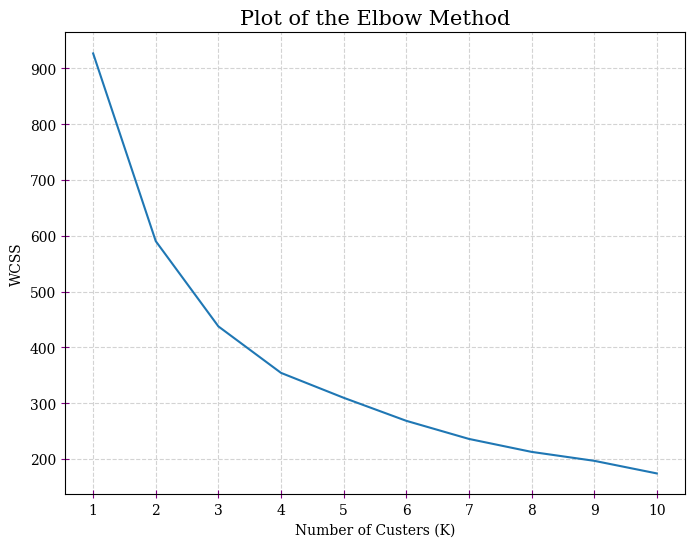

In [28]:
# Plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [29]:
# Training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [30]:
# Checking the labels assigned to each data point
print(kmean.labels_)

[3 0 1 0 0 3 0 0 0 1 1 0 0 0 0 0 3 0 0 0 0 1 0 3 3 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 3 0 1 0 0 0 0 3 3 0 1 3 0 0 1 0 0 2 0 3 0 1 0 1 0 3 0 1 2 1 0 1 3 1
 0 0 1 2 1 3 0 1 2 0 1 0 1 1 1 0 1 2 0 1 0 0 0 0 0 1 1 1 1]


In [31]:
# Checking the size of clusters
pd.Series(kmean.labels_).value_counts()

0    55
1    30
3    13
2     5
dtype: int64

In [32]:
# Adding a new feature of cluster labels to the dataset 3
df2['clusters'] = kmean.labels_

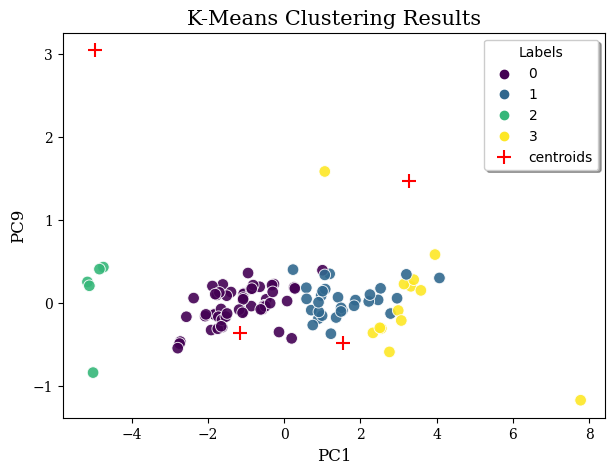

In [39]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="+", c="r", s=90, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.legend(title='Labels', shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()